In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'Employment': ['F', 'F', 'E', 'S', 'S', 'S', 'E', 'F', 'F', 'S', 'F', 'E', 'E', 'F'],
    'Education': ['G', 'G', 'G', 'G', 'U', 'U', 'U', 'G', 'U', 'U', 'U', 'G', 'U', 'G'],
    'Gender': ['F', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M'],
    'Purchase': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']
})

In [3]:
df = pd.get_dummies(df, columns=['Employment', 'Education', 'Gender'])

In [4]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [5]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

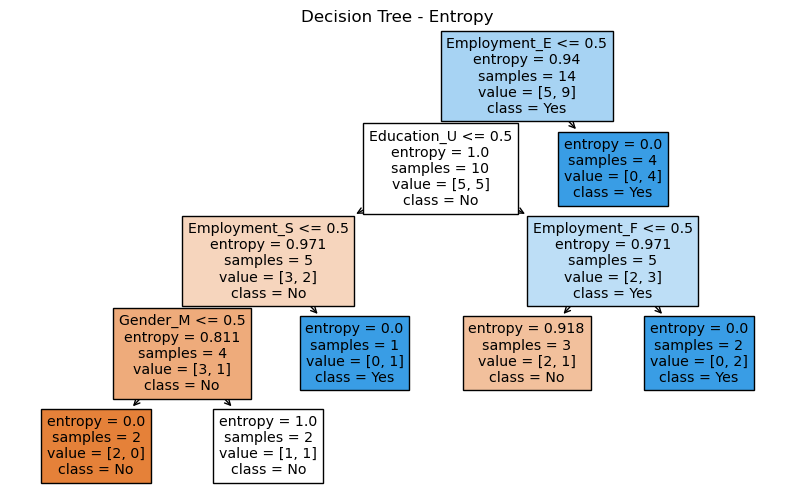

In [6]:
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, feature_names=X.columns.tolist(), class_names=clf_entropy.classes_.tolist(), filled=True)
plt.title('Decision Tree - Entropy')
plt.show()

In [7]:
def find_pure_leaves(tree_model):
    leaves = tree_model.apply(X)
    unique_leaves = set(leaves)
    pure_leaves = []
    for leaf in unique_leaves:
        indices = (leaves == leaf)
        unique_classes = y[indices].unique()
        if len(unique_classes) == 1:
            pure_leaves.append(leaf)
    return pure_leaves


pure_leaves_entropy = find_pure_leaves(clf_entropy)
print("Leaves pure:", pure_leaves_entropy)

Leaves pure: [4, 6, 9, 10]


In [8]:
new_df = pd.DataFrame({
    'Employment_E': [1,0],
    'Employment_F': [0,0],
    'Employment_S': [0,1],
    'Education_G': [1,1],
    'Education_U': [0,0],
    'Gender_F': [1,1],
    'Gender_M': [0,0]
})
new_df

,Employment_E,Employment_F,Employment_S,Education_G,Education_U,Gender_F,Gender_M
0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0


In [9]:
prediction_entropy = clf_entropy.predict(new_df)
prediction_entropy

array(['Yes', 'Yes'], dtype=object)

# gini impurity index

In [10]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X, y)

DecisionTreeClassifier()

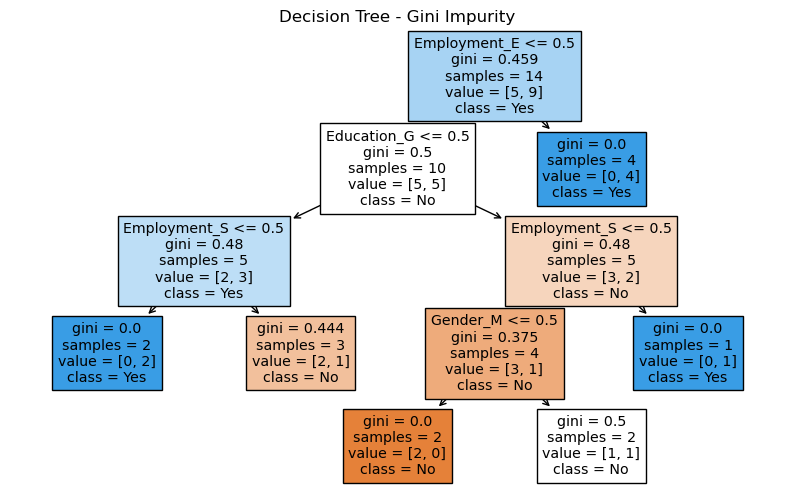

In [11]:
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, feature_names=X.columns.tolist(), class_names=clf_gini.classes_.tolist(), filled=True)
plt.title('Decision Tree - Gini Impurity')
plt.show()

In [12]:
pure_leaves_gini = find_pure_leaves(clf_gini)
print("Leaves pure:", pure_leaves_gini)

Leaves pure: [3, 7, 9, 10]


In [13]:
prediction_gini = clf_gini.predict(new_df)
prediction_gini

array(['Yes', 'Yes'], dtype=object)